# Hands-on Lab: Extract, Transfrom and Load GDP Data

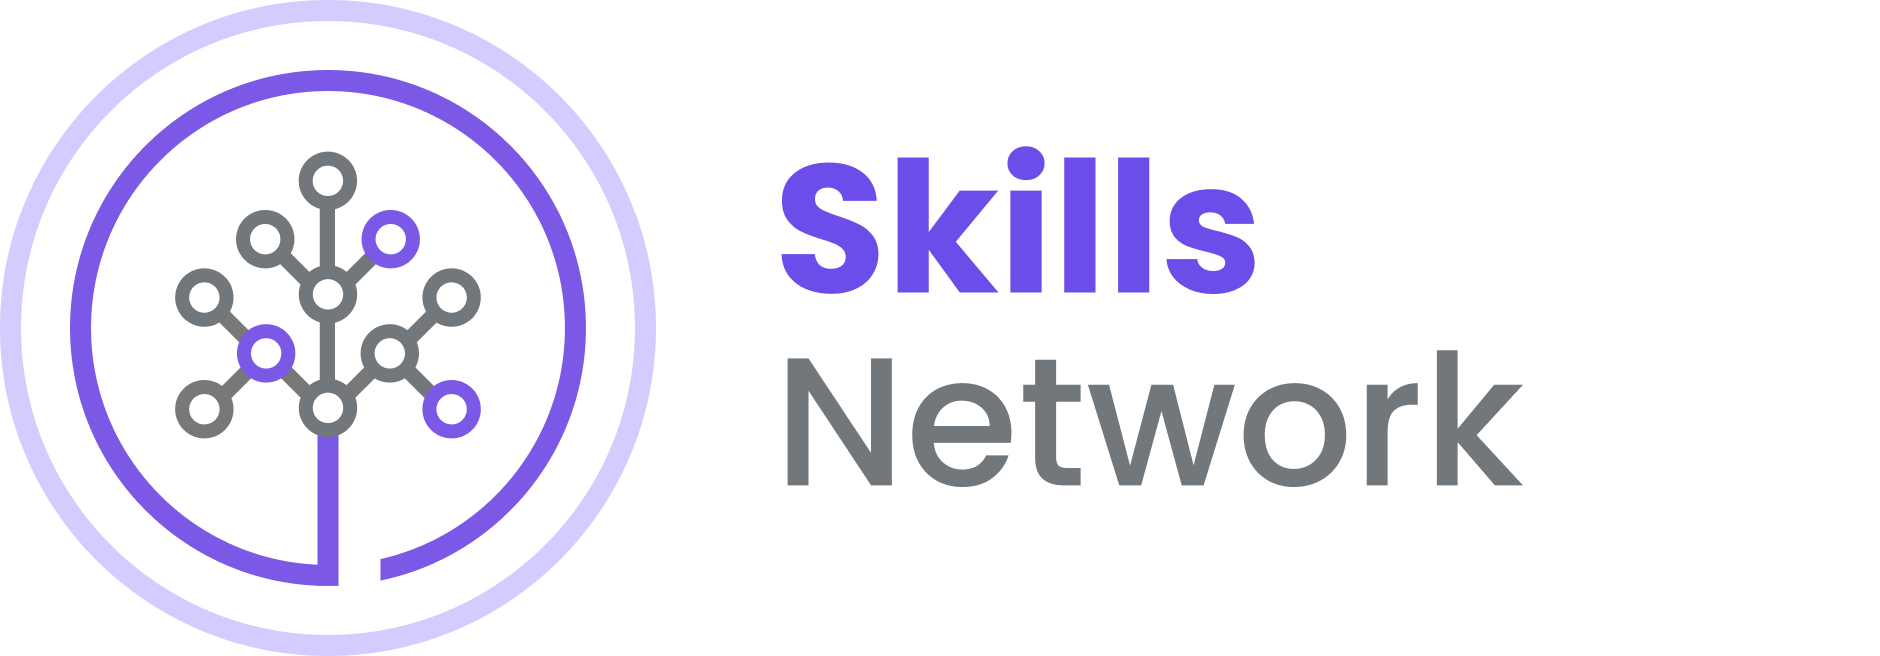

Estimated Effort: 60 mins

## Introduction
In this practice project, you will put the skills acquired through the course to use and create a complete ETL pipeline for accessing data from a website and processing it to meet the requirements.

Project Scenario:
An international firm that is looking to expand its business in different countries across the world has recruited you. You have been hired as a junior Data Engineer and are tasked with creating an automated script that can extract the list of all countries in order of their GDPs in billion USDs (rounded to 2 decimal places), as logged by the International Monetary Fund (IMF). Since IMF releases this evaluation twice a year, this code will be used by the organization to extract the information as it is updated.

The required data seems to be available on the URL mentioned below:

URL:

In [ ]:
'https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29'

The required information needs to be made accessible as a CSV file Countries_by_GDP.csv as well as a table Countries_by_GDP in a database file World_Economies.db with attributes Country and GDP_USD_billion.

Your boss wants you to demonstrate the success of this code by running a query on the database table to display only the entries with more than a 100 billion USD economy. Also, you should log in a file with the entire process of execution named etl_project_log.txt.

You must create a Python code 'etl_project_gdp.py' that performs all the required tasks.

## Objectives
You have to complete the following tasks for this project

Write a data extraction function to retrieve the relevant information from the required URL.

Transform the available GDP information into 'Billion USD' from 'Million USD'.

Load the transformed information to the required CSV file and as a database file.

Run the required query on the database.

Log the progress of the code with appropriate timestamps.


## Initial setup
Before you start building the code, you need to install the required libraries for it.

The libraries needed for the code are as follows:

1. requests - The library used for accessing the information from the URL.

2. bs4 - The library containing the BeautifulSoup function used for webscraping.

3. pandas - The library used for processing the extracted data, storing it to required formats and communicating with the databases.

4. sqlite3 - The library required to create a database server connection.

5. numpy - The library required for the mathematical rounding operation as required in the objectives.

6. datetime - The library containing the function datetime used for extracting the timestamp for logging purposes.

As discussed before, use the following command format in a terminal window to install the libraries.

In [ ]:
python3.11 -m pip install <library_name>

While requests, sqlite3, and datetime come bundled with python, the other libraries will have to be installed.

In [ ]:
python3.11 -m pip install pandas
python3.11 -m pip install numpy
python3.11 -m pip install bs4

Once the required libraries are installed, create a file etl_project_gdp.py in the path \home\project\.

## Code structure
The code should be created in an organized manner such that you can perform each task with a dedicated function. For reference, you can copy paste the structure as shown below to etl_project_gdp.py.

In [ ]:
# Code for ETL operations on Country-GDP data

# Importing the required libraries

def extract(url, table_attribs):
    ''' This function extracts the required
    information from the website and saves it to a dataframe. The
    function returns the dataframe for further processing. '''

    return df

def transform(df):
    ''' This function converts the GDP information from Currency
    format to float value, transforms the information of GDP from
    USD (Millions) to USD (Billions) rounding to 2 decimal places.
    The function returns the transformed dataframe.'''

    return df

def load_to_csv(df, csv_path):
    ''' This function saves the final dataframe as a `CSV` file 
    in the provided path. Function returns nothing.'''

def load_to_db(df, sql_connection, table_name):
    ''' This function saves the final dataframe as a database table
    with the provided name. Function returns nothing.'''

def run_query(query_statement, sql_connection):
    ''' This function runs the stated query on the database table and
    prints the output on the terminal. Function returns nothing. '''

def log_progress(message):
    ''' This function logs the mentioned message at a given stage of the code execution to a log file. Function returns nothing'''

''' Here, you define the required entities and call the relevant 
functions in the correct order to complete the project. Note that this
portion is not inside any function.'''

## Preliminary: Importing libraries and defining known values
As per the requirement, write the commands in etl_project_gdp.py at the position specified in the code structure, to import the relevant libraries.

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime 

Further, you need to initialize all the known entities. These are mentioned below:

1. URL:

In [ ]:
'https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29'

2. table_attribs: The attributes or column names for the dataframe stored as a list. Since the data available in the website is in USD Millions, the attributes should initially be 'Country' and 'GDP_USD_millions'. This will be modified in the transform function later.

3. db_name: As mentioned in the Project scenario, 'World_Economies.db'

4. table_name: As mentioned in the Project scenario, 'Countries_by_GDP'

5. csv_path: As mentioned in the Project scenario, 'Countries_by_GDP.csv'

You should log the initialization process

In [ ]:
url = 'https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29'
table_attribs = ["Country", "GDP_USD_millions"]
db_name = 'World_Economies.db'
table_name = 'Countries_by_GDP'
csv_path = './Countries_by_GDP.csv'

## Task 1: Extracting information
Extraction of information from a web page is done using the web scraping process. For this, you'll have to analyze the link and come up with the strategy of how to get the required information. The following points are worth observing for this task.

Inspect the URL and note the position of the table. Note that even the images with captions in them are stored in tabular format. Hence, in the given webpage, our table is at the third position, or index 2. Among this, we require the entries under 'Country/Territory' and 'IMF -> Estimate'.

Note that there are a few entries in which the IMF estimate is shown to be '—'. Also, there is an entry at the top named 'World', which we do not require. Segregate this entry from the others because this entry does not have a hyperlink and all others in the table do. So you can take advantage of that and access only the rows for which the entry under 'Country/Terriroty' has a hyperlink associated with it.

Note that '—' is a special character and not a general hyphen, '-'. Copy the character from the instructions here to use in the code.

Assuming the function gets the URL and the table_attribs parameters as arguments, complete the function extract() in the code following the steps below.

1. Extract the web page as text.
Click here for hint:
Use the 'requests.get()' function with 'text' attribute.

2. Parse the text into an HTML object.
Click here for hint:
Use the 'BeautifulSoup()' function with the 'html.parser' argument.

3. Create an empty pandas DataFrame named df with columns as the table_attribs.
Click here for hint:
Use the 'pandas.DataFrame' function with the 'column' argument set as table_attribs.

4. Extract all 'tbody' attributes of the HTML object and then extract all the rows of the index 2 table using the 'tr' attribute.
Click here for hint:
Use the 'find_all()' function of the HTML object to gather all attributes of specific type.

5. Check the contents of each row, having attribute ‘td’, for the following conditions.
a. The row should not be empty.
b. The first column should contain a hyperlink.
c. The third column should not be '—'.
Click here for hint:
Run a for loop and check the conditions using if statements.

6. Store all entries matching the conditions in step 5 to a dictionary with keys the same as entries of table_attribs. Append all these dictionaries one by one to the dataframe.
Click here for hint:
You'll need the pandas.concat() function to append the dictionary. Remember to keep the ignore_index parameter as 'True'.
Click here for solution:

In [ ]:
def extract(url, table_attribs):
    page = requests.get(url).text
    data = BeautifulSoup(page,'html.parser')
    df = pd.DataFrame(columns=table_attribs)
    tables = data.find_all('tbody')
    rows = tables[2].find_all('tr')
    for row in rows:
        col = row.find_all('td')
        if len(col)!=0:
            if col[0].find('a') is not None and '—' not in col[2]:
                data_dict = {"Country": col[0].a.contents[0],
                             "GDP_USD_millions": col[2].contents[0]}
                df1 = pd.DataFrame(data_dict, index=[0])
                df = pd.concat([df,df1], ignore_index=True)
    return df

## Task 2: Transform information
The transform function needs to modify the ‘GDP_USD_millions’. You need to cover the following points as a part of the transformation process.

1. Convert the contents of the 'GDP_USD_millions' column of df dataframe from currency format to floating numbers.
Click here for hint:
a. Save the dataframe column as a list. b. Iterate over the contents of the list and use split() and join() functions to convert the currency text into numerical text. Type cast the numerical text to float.

2. Divide all these values by 1000 and round it to 2 decimal places.
Click here for hint:
Use the numpy.round() function for rounding. Assign the modified list back to the dataframe.

3. Modify the name of the column from 'GDP_USD_millions' to 'GDP_USD_billions'.
Click here for hint:
You'll need the df.rename() function.

Click here for solution:

In [ ]:
def transform(df):
    GDP_list = df["GDP_USD_millions"].tolist()
    GDP_list = [float("".join(x.split(','))) for x in GDP_list]
    GDP_list = [np.round(x/1000,2) for x in GDP_list]
    df["GDP_USD_millions"] = GDP_list
    df=df.rename(columns = {"GDP_USD_millions":"GDP_USD_billions"})
    return df

## Task 3: Loading information
Loading process for this project is two fold.

1. You have to save the transformed dataframe to a CSV file. For this, pass the dataframe df and the CSV file path to the function load_to_csv() and add the required statements there.
Click here for hint:
Use the 'to_csv()' function object for the pandas dataframe.

Click here for solution:

In [ ]:
def load_to_csv(df, csv_path):
    df.to_csv(csv_path)

2. You have to save the transformed dataframe as a table in the database. This needs to be implemented in the function load_to_db(), which accepts the dataframe df, the connection object to the SQL database conn, and the table name variable table_name to be used.
Click here for hint:
Use the 'to_sql()' function object for the pandas dataframe.

Click here for solution:

In [ ]:
def load_to_db(df, sql_connection, table_name):
    df.to_sql(table_name, sql_connection, if_exists='replace', index=False)

## Task 4: Querying the database table
Assuming that the appropriate query was initiated and the query statement has been passed to the function run_query(), along with the SQL connection object sql_connection and the table name variable table_name, this function should run the query statement on the table and retrieve the output as a filtered dataframe. This dataframe can then be simply printed.

Click here for hint:
Use the pandas.read_sql() function to run the query on the database table.

Click here for solution:

In [ ]:
def run_query(query_statement, sql_connection):
    print(query_statement)
    query_output = pd.read_sql(query_statement, sql_connection)
    print(query_output)

## Task 5: Logging progress
Logging needs to be done using the log_progress() funciton. This function will be called multiple times throughout the execution of this code and will be asked to add a log entry in a .txt file, etl_project_log.txt. The entry is supposed to be in the following format:

'<Time_stamp> : <message_text>'

Here, message text is passed to the function as an argument. Each entry must be in a separate line.

Click here for hint:
Use datetime.now() function to get the current timestamp.

Click here for solution:

In [ ]:
def log_progress(message): 
    timestamp_format = '%Y-%h-%d-%H:%M:%S' # Year-Monthname-Day-Hour-Minute-Second 
    now = datetime.now() # get current timestamp 
    timestamp = now.strftime(timestamp_format) 
    with open("./etl_project_log.txt","a") as f: 
        f.write(timestamp + ' : ' + message + '\n')

Function calls
Now, you have to set up the sequence of function calls for your assigned tasks. Follow the sequence below.

Task	                    Log message on completion
Declaring known values	    Preliminaries complete. Initiating ETL process.
Call extract() function	    Data extraction complete. Initiating Transformation process.
Call transform() function	Data transformation complete. Initiating loading process.
Call load_to_csv()	        Data saved to CSV file.
Initiate SQLite3 connection	SQL Connection initiated.
Call load_to_db()	        Data loaded to Database as table. Running the query.
Call run_query() *	        Process Complete.
Close SQLite3 connection	-

Note: The query statement to be executed here is

f"SELECT * from {table_name} WHERE GDP_USD_billions >= 100"

Click here for solution:

In [ ]:
log_progress('Preliminaries complete. Initiating ETL process')

df = extract(url, table_attribs)

log_progress('Data extraction complete. Initiating Transformation process')

df = transform(df)

log_progress('Data transformation complete. Initiating loading process')

load_to_csv(df, csv_path)

log_progress('Data saved to CSV file')

sql_connection = sqlite3.connect('World_Economies.db')

log_progress('SQL Connection initiated.')

load_to_db(df, sql_connection, table_name)

log_progress('Data loaded to Database as table. Running the query')

query_statement = f"SELECT * from {table_name} WHERE GDP_USD_billions >= 100"
run_query(query_statement, sql_connection)

log_progress('Process Complete.')

sql_connection.close()

## Code Execution and expected output
Once the code is complete, execute it through the terminal using the following command:

In [ ]:
python3.11 etl_project_gdp.py

You should be able to make the following observations.

1. Output of the terminal
Terminal output.
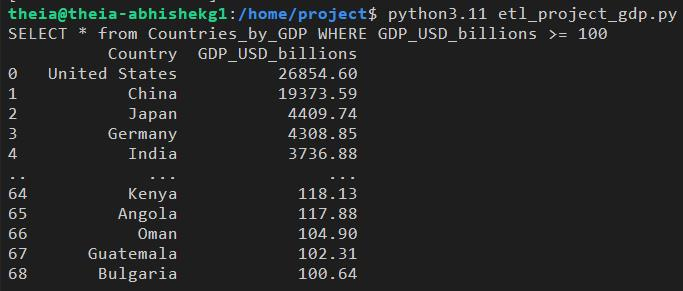

2. Created files and the log contents
Project files and log contents.

Important Note:

Maintaining consistency of the lab structure, the webpage being accessed is routed through an archive database. Often, in case the archive server is busy, the users may encounter delayed execution and/or an error such as:
requests.exceptions.ConnectionError: HTTPSConnectionPool(host=’web.archive.org’, port=443): Max retries exceeded with url.
In such a situation, try executing the code again. In case the problem persists, you can change the URL to the live version, such as:
https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29

Practice project solution
In case you are not able to get the required output from the code or are facing some errors, the final file for etl_project_gdp.py is shared below. Please note that this is for your help, and we encourage you to first try to resolve the errors on your own.

etl_project_gdp.py